In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

data = json.load(open("summary.json"))



In [12]:
records = []
for model, evaluators in data["refusal"].items():
    for entry in evaluators["JailbreakSuccessEvaluator"]:
        records.append({
            "Model": model,
            "Method": entry["Method"],
            "total_evaluated": entry["total_evaluated"],
            "refusal_rate": entry["refusal_rate"]
        })

df = pd.DataFrame(records)


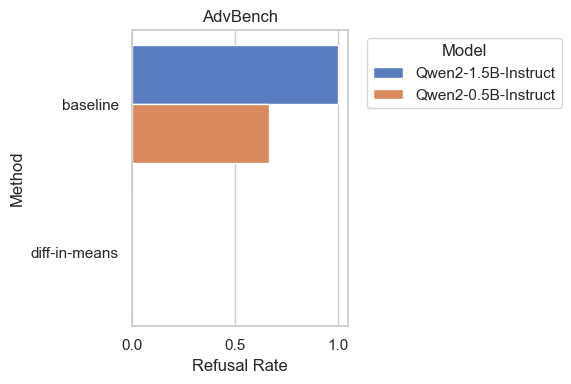

In [15]:

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

# Create a grouped barplot using seaborn
plot = sns.barplot(
    data=df,
    x="refusal_rate",
    y="Method",
    hue="Model",
    dodge=True,
    palette="muted"
)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Refusal Rate")
plt.title("AdvBench")
plt.tight_layout()

plt.show()

In [14]:
df

,Model,Method,total_evaluated,refusal_rate
0,Qwen2-1.5B-Instruct,baseline,3,1.000000
1,Qwen2-1.5B-Instruct,diff-in-means,3,0.000000
2,Qwen2-0.5B-Instruct,baseline,3,0.666667
3,Qwen2-0.5B-Instruct,diff-in-means,3,0.000000
